# **LAB - 4**

## **Advanced 1**

Enter variable: State
Enter comparison >,<,=: =
Enter value of cutoff: MN
Do you want to slice by another variable (Y for yes?): Y
Enter variable: Status
Enter comparison >,<,=: =
Enter value of cutoff: Active
Do you want to slice by another variable (Y for yes?): Yes
Enter variable: Bo_Age
Enter comparison >,<,=: <
Enter value of cutoff: 31
Do you want to slice by another variable (Y for yes?): YES
Enter variable: Tot_mthly_incm
Enter comparison >,<,=: >
Enter value of cutoff: 3000
Do you want to slice by another variable (Y for yes?): N


,Cust_ID,Bo_Age,Ln_Orig,Orig_LTV_Ratio_Pct,Credit_score,First_home,Tot_mthly_debt_exp,Tot_mthly_incm,orig_apprd_val_amt,pur_prc_amt,DTI Ratio,Status,OUTCOME,State,Median_state_inc,UPB>Appraisal
78,1078,29,159000.0,100,684,N,1432,5000,247000,159000,0.286400,Active,non-default,MN,"55,914",0
590,1590,29,278000.0,100,728,Y,1054,4440,62000,61000,0.237387,Active,non-default,MN,"55,914",1
1569,2569,23,105450.0,95,800,N,529,6583,91000,89600,0.080358,Active,non-default,MN,"55,914",1
2802,3802,29,200000.0,79,668,Y,1039,3100,118000,116915,0.335161,Active,non-default,MN,"55,914",1
3063,4063,24,146800.0,100,705,Y,1410,3988,124000,122000,0.353561,Active,non-default,MN,"55,914",1
3217,4217,23,94902.0,102,633,N,2944,5838,125000,125000,0.504282,Active,non-default,MN,"55,914",0
3962,4962,24,132750.0,93,722,Y,1735,4700,140000,139000,0.369149,Active,non-default,MN,"55,914",0
4330,5330,29,78375.0,95,696,Y,1632,4506,147000,146500,0.362184,Active,non-default,MN,"55,914",0
4574,5574,29,80910.0,90,770,Y,1713,5949,152500,151350,0.287948,Active,non-default,MN,"55,914",0
4958,5958,28,179500.0,100,699,Y,1759,3714,160000,159900,0.473613,Active,non-default,MN,"55,914",1


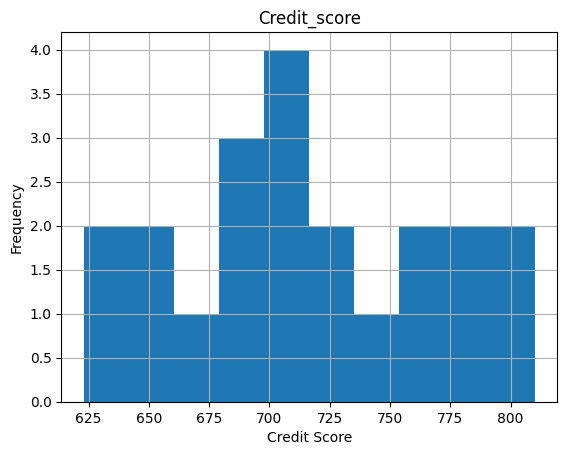

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def check_input(var, val, df):
    count = 0
    # if (var in df.columns and val in df[var].values):
    
    #Checks if the coloumn name entered is in df
    if (var in df.columns):
        count = 1

    if count == 1:
        return True
    else:
        return False

def filtering(var, comp, val, df_og):
    # If the val is digit, then it typecasts the str value into into, so that it matches with the datatype of the df and filtering works
    if (val.isdigit()==True):
        val = int(val)
    
    # 3 cases depending on the filtering comparision operator 
    if (comp=="="):
        df_new = df_og[df_og[var]==val]
    elif (comp==">"):
        df_new = df_og[df_og[var]>val]
    elif (comp=="<"):
        df_new = df_og[df_og[var]<val]
    else:
        print("Wrong comparison operator")
        return df_og

    # Returns the filered df
    return df_new

def display_hist(df):

    # Normal histogram plot with tittle, labels and grid as True
    plt.hist(df["Credit_score"])
    plt.title("Credit_score")
    plt.xlabel("Credit Score")
    plt.ylabel("Frequency")
    plt.grid(True)   # adds gridlines like your plot
    plt.show()

def main():
    df = pd.read_csv("loan default.csv")
# df.columns=df.columns.str.lower().str.replace("_", " ") # We can use this, if the user doesn't want to give exact coloumn name
    df_current = df.copy()


    while True:
        # Input Values
        var = input("Enter variable: ")
        print("Enter variable: {}".format(var))
        comp = input("Enter comparison >,<,=: ")
        print("Enter comparison >,<,=: {}".format(comp))
        val = input("Enter value of cutoff: ")
        print("Enter value of cutoff: {}".format(val))


        # This is an extra validation to check the coloumn name we entered is present in the dataframe
        checker = check_input(var, val, df)

        # If it coloumn name does exist we go ahead and ask the user if we need multiple filtering
        if(checker):
            resp = input("Do you want to slice by another variable (Y for yes?): ")
            print("Do you want to slice by another variable (Y for yes?): {}".format(resp))

            # This send the coloun name, value and merged dataframe to another function in order to perform filtering
            # In the first iteration we pass therough the initial merged df and later on we override the past df copy with the filtered data and pass that
            df_current = filtering(var, comp, val, df_current)
            
            # If the user say no, the filtering stops and print out the latest df
            if resp == "N" or resp == "No":
                display(df_current.head(10))
                # print(df_current["Cust_ID"].count())
                display_hist(df_current)
                break
            else:
                continue
        else:
            print("Invalid Input for Variable or Value")

        # To confirm that filtering works correctly
        # mn_count = (df_new["State"] == "MN").count()
        # total_count = len(df_new)
        # print(mn_count, total_count)

main()

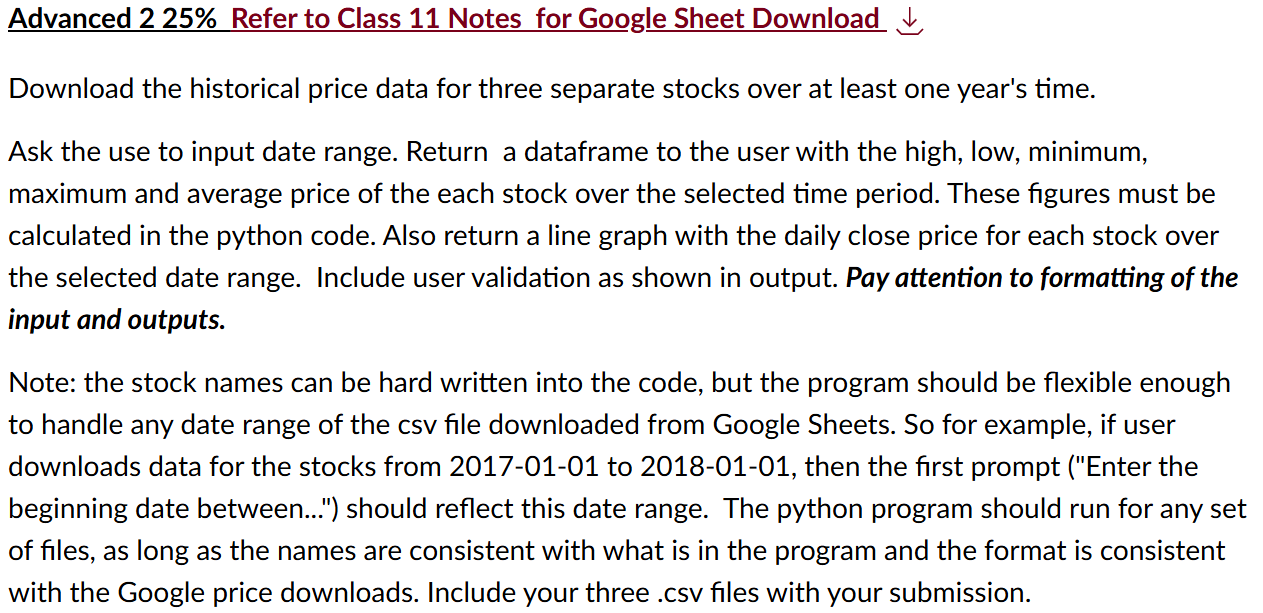

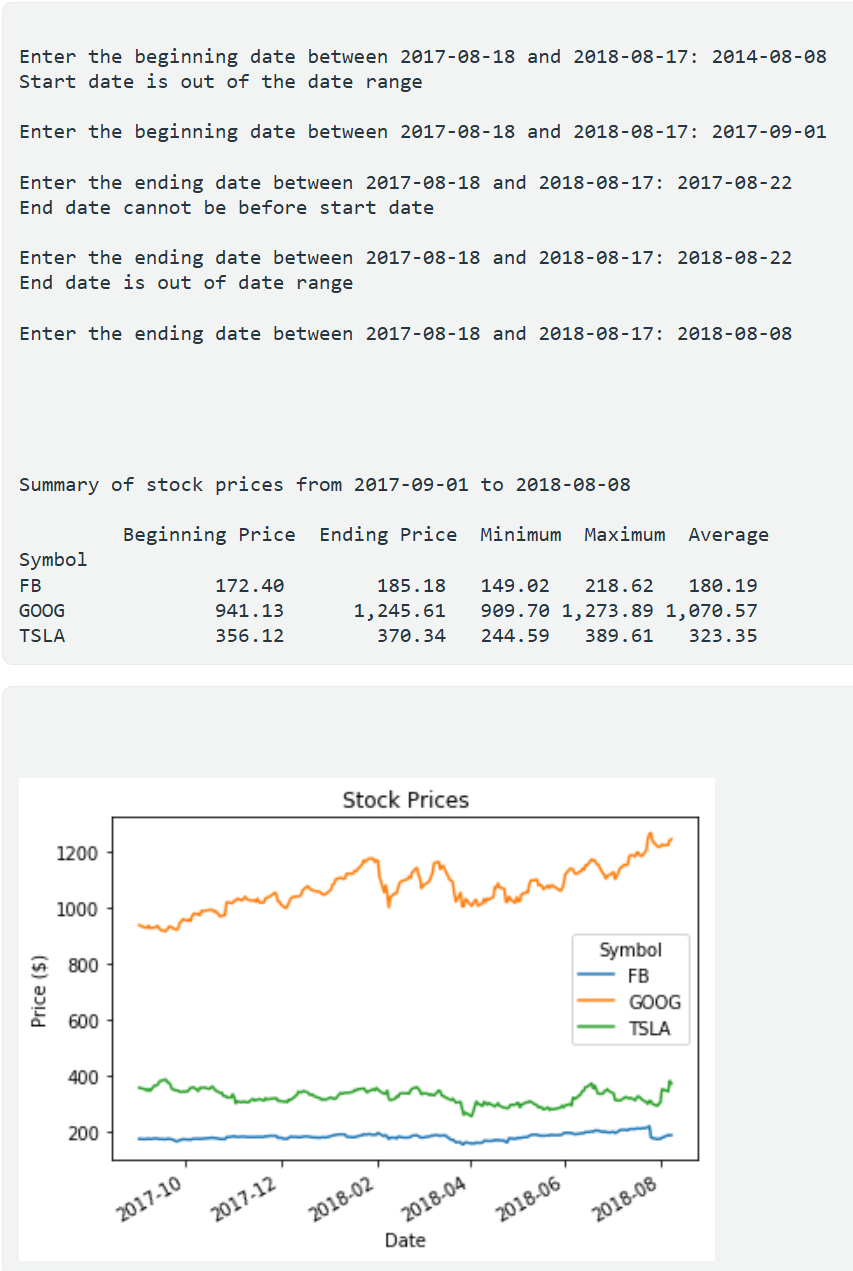

,Date,Close_META,Close_GOOG,Close_TSLA
0,9/1/2017,172.02,46.87,23.69
1,9/5/2017,170.72,46.42,23.31
2,9/6/2017,172.09,46.39,22.97
3,9/7/2017,173.21,46.80,23.37
4,9/8/2017,170.95,46.33,22.89
...,...,...,...,...
230,8/2/2018,176.37,61.31,23.30
231,8/3/2018,177.78,61.19,23.21
232,8/6/2018,185.69,61.24,22.80
233,8/7/2018,183.81,62.11,25.30


Summary of stock prices from 9/1/2017 to 8/8/2018

       		Beginning Price		Ending price		Minimum		Maximum		Average
Symbol
FB     		172.02			185.18			217.5		152.22		180.19
GOOG   		46.87			62.28			63.42		45.75		53.53
TSLA   		23.69			24.69			25.67		16.83		21.56


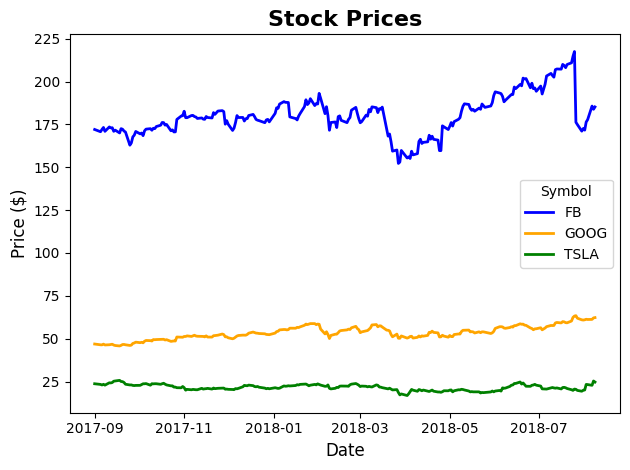

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def clean_date(list1):
    for i in range(len(list1)):
        list1[i]["Date"] = list1[i]["Date"].str.split(" ").str[0]
        # list1[i]["Date"] = pd.to_datetime(list1[i]["Date"])
    # print(list1)
    return list1

def cal_mean(merged_df, count_index, stock_ticker):
    str_print = "Close_"+stock_ticker
    beg_val = merged_df[str_print][0]
    end_val = merged_df[str_print][count_index-1]
    max_val = merged_df[str_print].max()
    min_val = merged_df[str_print].min()
    avg_val = merged_df[str_print].mean()
    list_print = [beg_val, end_val, max_val, min_val, round(avg_val,2)]
    return list_print

def describe_df(merged_df):
    count_index = merged_df["Date"].count()
    print("Summary of stock prices from {} to {}\n".format(merged_df["Date"][0], merged_df["Date"][count_index-1]))
    print("       "+"\t\tBeginning Price"+"\t\tEnding price"+"\t\tMinimum"+"\t\tMaximum"+"\t\tAverage")
    print("Symbol")
    list_print = cal_mean(merged_df, count_index, "META")
    print("FB     \t\t{}\t\t\t{}\t\t\t{}\t\t{}\t\t{}".format(list_print[0], list_print[1], list_print[2], list_print[3], list_print[4]))
    list_print = cal_mean(merged_df, count_index, "GOOG")
    print("GOOG   \t\t{}\t\t\t{}\t\t\t{}\t\t{}\t\t{}".format(list_print[0], list_print[1], list_print[2], list_print[3], list_print[4]))
    list_print = cal_mean(merged_df, count_index, "TSLA")
    print("TSLA   \t\t{}\t\t\t{}\t\t\t{}\t\t{}\t\t{}".format(list_print[0], list_print[1], list_print[2], list_print[3], list_print[4]))

def graph_plot(merged_df):
    merged_df["Date"] = pd.to_datetime(merged_df["Date"]) # To make DATE in datetime aned reduce cluter on x asis

    plt.plot(merged_df["Date"], merged_df["Close_META"], color='blue', linewidth=2, label='FB')
    plt.plot(merged_df["Date"], merged_df["Close_GOOG"], color='orange', linewidth=2, label='GOOG')
    plt.plot(merged_df["Date"], merged_df["Close_TSLA"], color='green', linewidth=2, label='TSLA')

    plt.title('Stock Prices', fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price ($)', fontsize=12)
    plt.legend(title='Symbol', loc='right')
    plt.tight_layout()
    plt.show()

def main():
    df_META = pd.read_csv("Meta_FB - 2017-9-18 to 2018-8-17 - Sheet1.csv")
    df_GOOG = pd.read_csv("GOOG - 2017-9-18 to 2018-8-17 - Sheet1.csv")
    df_TSLA = pd.read_csv("TSLA - 2017-9-18 to 2018-8-17 - Sheet1.csv")

    df_META.rename(columns={"Close":"Close_META"}, inplace=True)
    df_GOOG.rename(columns={"Close":"Close_GOOG"}, inplace=True)
    df_TSLA.rename(columns={"Close":"Close_TSLA"}, inplace=True)

    list1 = [df_META, df_GOOG, df_TSLA]
    list2 = []
    list2 = clean_date(list1)
    
    merged_df = pd.merge(list2[0], list2[1], on="Date", how="inner")
    merged_df = pd.merge(merged_df, list2[2], on="Date", how="inner")
    display(merged_df)

    # while True: 
    #     count_index = merged_df["Date"].count()
    #     val_beg = "2014-08-08"
    #     # val_beg = input("Enter the begining date between {} and {}: ".format(merged_df["Date"][0], merged_df["Date"][count_index-1]))
    #     print("Enter the begining date between {} and {}: {}".format(merged_df["Date"][0], merged_df["Date"][count_index-1], val_beg))
    #     if (merged_df["Date"][0]<=val_beg<=merged_df["Date"][count_index-1]):
    #             break
    #     else:
    #         print("Start date is out of the data range")
    #         continue
    
    # while True:
    #     val_end = "2017-08-22"
    #     # val_end = input("Enter the ending date between {} and {}: ".format(merged_df["Date"][0], merged_df["Date"][count_index-1]))
    #     print("Enter the begining date between {} and {}: ".format(merged_df["Date"][0], merged_df["Date"][count_index-1]))
    #     if (merged_df["Date"][0]<=val_end<=merged_df["Date"][count_index-1]):
    #         break
    #     else:
    #         print("Start date is out of the data range")
    #         continue
            

    describe_df(merged_df)

    graph_plot(merged_df)

main()

In [ ]:
####  COPY

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

dateime.date(df['Date'])
df['Date'].datetime.date()



def clean_date(list1):
    for i in range(len(list1)):
        list1[i]["Date"] = list1[i]["Date"].str.split(" ").str[0]
        # list1[i]["Date"] = pd.to_datetime(list1[i]["Date"])
    # print(list1)
    return list1

def cal_mean(merged_df, count_index, stock_ticker):
    str_print = "Close_"+stock_ticker
    beg_val = merged_df[str_print][0]
    end_val = merged_df[str_print][count_index-1]
    max_val = merged_df[str_print].max()
    min_val = merged_df[str_print].min()
    avg_val = merged_df[str_print].mean()
    list_print = [beg_val, end_val, max_val, min_val, round(avg_val,2)]
    return list_print

def describe_df(merged_df):
    count_index = merged_df["Date"].count()
    print("Summary of stock prices from {} to {}\n".format(merged_df["Date"][0], merged_df["Date"][count_index-1]))
    print("       "+"\t\tBeginning Price"+"\t\tEnding price"+"\t\tMinimum"+"\t\tMaximum"+"\t\tAverage")
    print("Symbol")
    list_print = cal_mean(merged_df, count_index, "META")
    print("FB     \t\t{}\t\t\t{}\t\t\t{}\t\t{}\t\t{}".format(list_print[0], list_print[1], list_print[2], list_print[3], list_print[4]))
    list_print = cal_mean(merged_df, count_index, "GOOG")
    print("GOOG   \t\t{}\t\t\t{}\t\t\t{}\t\t{}\t\t{}".format(list_print[0], list_print[1], list_print[2], list_print[3], list_print[4]))
    list_print = cal_mean(merged_df, count_index, "TSLA")
    print("TSLA   \t\t{}\t\t\t{}\t\t\t{}\t\t{}\t\t{}".format(list_print[0], list_print[1], list_print[2], list_print[3], list_print[4]))

def graph_plot(merged_df):
    merged_df["Date"] = pd.to_datetime(merged_df["Date"]) # To make DATE in datetime aned reduce cluter on x asis

    plt.plot(merged_df["Date"], merged_df["Close_META"], color='blue', linewidth=2, label='FB')
    plt.plot(merged_df["Date"], merged_df["Close_GOOG"], color='orange', linewidth=2, label='GOOG')
    plt.plot(merged_df["Date"], merged_df["Close_TSLA"], color='green', linewidth=2, label='TSLA')

    plt.title('Stock Prices', fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price ($)', fontsize=12)
    plt.legend(title='Symbol', loc='right')
    plt.tight_layout()
    plt.show()

def main():
    df_META = pd.read_csv("Meta_FB - 2017-9-18 to 2018-8-17 - Sheet1.csv")
    df_GOOG = pd.read_csv("GOOG - 2017-9-18 to 2018-8-17 - Sheet1.csv")
    df_TSLA = pd.read_csv("TSLA - 2017-9-18 to 2018-8-17 - Sheet1.csv")

    df_META.rename(columns={"Close":"Close_META"}, inplace=True)
    df_GOOG.rename(columns={"Close":"Close_GOOG"}, inplace=True)
    df_TSLA.rename(columns={"Close":"Close_TSLA"}, inplace=True)

    list1 = [df_META, df_GOOG, df_TSLA]
    list2 = []
    list2 = clean_date(list1)
    
    merged_df = pd.merge(list2[0], list2[1], on="Date", how="inner")
    merged_df = pd.merge(merged_df, list2[2], on="Date", how="inner")
    display(merged_df)

    # while True: 
    #     count_index = merged_df["Date"].count()
    #     val_beg = "2014-08-08"
    #     # val_beg = input("Enter the begining date between {} and {}: ".format(merged_df["Date"][0], merged_df["Date"][count_index-1]))
    #     print("Enter the begining date between {} and {}: {}".format(merged_df["Date"][0], merged_df["Date"][count_index-1], val_beg))
    #     if (merged_df["Date"][0]<=val_beg<=merged_df["Date"][count_index-1]):
    #             break
    #     else:
    #         print("Start date is out of the data range")
    #         continue
    
    # while True:
    #     val_end = "2017-08-22"
    #     # val_end = input("Enter the ending date between {} and {}: ".format(merged_df["Date"][0], merged_df["Date"][count_index-1]))
    #     print("Enter the begining date between {} and {}: ".format(merged_df["Date"][0], merged_df["Date"][count_index-1]))
    #     if (merged_df["Date"][0]<=val_end<=merged_df["Date"][count_index-1]):
    #         break
    #     else:
    #         print("Start date is out of the data range")
    #         continue
            

    describe_df(merged_df)

    graph_plot(merged_df)

main()